# Data Analysis Project

##### Data Science Foundation - Data Visualization

-------

# Life Expectancy and GDP Analysis

### Project Goals

This project aims to analyze the relationship between **Life Expectancy (LEB))** and **Gross Domestic Product (GDP)** across six countries over the 16-year period from 2000 to 2015.

Using data from the World Health Organization and the World Bank, the analysis includes:

- Trends in Life Expectancy and GDP over time.
- Correlation between Life Expectancy and GDP.
- Country-specific insights based on growth patterns.

Perform an Exploratory Data Analysis (EDA) to:
* Understand how GDP and Life Expectancy vary across countries and over time.
    * Which country has seen the biggest GDP and Life Expectancy Growth?
    * Has GDP and life expectancy increased over time in the six nations?
    * What is the average GDP and life expectancy in these nations?
    * What is the distribution of GDP and life expectancy?
* Investigate whether countries with higher GDP consistently exhibit higher life expectancy.
    * What is the relationship between GDP and Life Expectancy?
    * Is there a correlation between GDP and life expectancy of a country?


### Key Sections
1. Data Loading and Cleaning
2. Exploratory Data Analysis (EDA)
3. Visualizing Trends
4. Correlation Analysis

### Dataset

The dataset contains information for 6 countries with the following attributes:
* **Country**: Categorical data representing the six countries.
* **Year**: The 16 years from 2000 to 2015.
* **Life Expectancy at Birth (years)**: Continuous data measuring the average life expectancy at birth.
* **GDP**: Continuous data measuring the Gross Domestic Product in USD, represented in scientific notation for large values.

Total Records: 96 entries with no NULLs

-----------------------------------------

##  Data Loading and Cleaning

### Import Library and data

In [56]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats
import statsmodels.api as sm

# Import Data
data = pd.read_csv('all_data.csv')

### Inspect Data

In [57]:
# Inspect Data
data.info()
data.describe(include= 'all')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 4 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Country                           96 non-null     object 
 1   Year                              96 non-null     int64  
 2   Life expectancy at birth (years)  96 non-null     float64
 3   GDP                               96 non-null     float64
dtypes: float64(2), int64(1), object(1)
memory usage: 3.1+ KB


,Country,Year,Life expectancy at birth (years),GDP
count,96,96.000000,96.000000,9.600000e+01
unique,6,NaN,NaN,NaN
top,Chile,NaN,NaN,NaN
freq,16,NaN,NaN,NaN
mean,NaN,2007.500000,72.789583,3.880499e+12
std,NaN,4.633971,10.672882,5.197561e+12
min,NaN,2000.000000,44.300000,4.415703e+09
25%,NaN,2003.750000,74.475000,1.733018e+11
50%,NaN,2007.500000,76.750000,1.280220e+12
75%,NaN,2011.250000,78.900000,4.067510e+12


In [58]:
#Inspect first few rows
data.head()

,Country,Year,Life expectancy at birth (years),GDP
0,Chile,2000,77.3,7.786093e+10
1,Chile,2001,77.3,7.097992e+10
2,Chile,2002,77.8,6.973681e+10
3,Chile,2003,77.9,7.564346e+10
4,Chile,2004,78.0,9.921039e+10


### Data Preparation

#### Rename columns for easier data manipulation

In [59]:
# Rename columns 
data.rename(columns={
    'Country': 'country',
    'Year' : 'year',
    'Life expectancy at birth (years)': 'leb',
    'GDP' : 'gdp'
    }, inplace= True
)
# Review results
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   country  96 non-null     object 
 1   year     96 non-null     int64  
 2   leb      96 non-null     float64
 3   gdp      96 non-null     float64
dtypes: float64(2), int64(1), object(1)
memory usage: 3.1+ KB


#### Consolidate country values

In [60]:
# Consolidate country values
data.replace('United States of America', 'USA', inplace= True)
# Review results
data['country'].unique()

array(['Chile', 'China', 'Germany', 'Mexico', 'USA', 'Zimbabwe'],
      dtype=object)

#### Create new columns

In [61]:
# Create columns for GDP in Billions and Trillions
data['gdp_trillion'] = data['gdp'].apply(lambda x: round(x/1e12, 4))
data['gdp_billion'] = data['gdp'].apply(lambda x: round(x/1e9, 4))
# Review results
data.head()

,country,year,leb,gdp,gdp_trillion,gdp_billion
0,Chile,2000,77.3,7.786093e+10,0.0779,77.8609
1,Chile,2001,77.3,7.097992e+10,0.0710,70.9799
2,Chile,2002,77.8,6.973681e+10,0.0697,69.7368
3,Chile,2003,77.9,7.564346e+10,0.0756,75.6435
4,Chile,2004,78.0,9.921039e+10,0.0992,99.2104


In [62]:
# Create column rounding LEB values
data['rounded_leb'] = data['leb'].apply(lambda x: round(x))
# Review results
data.head()

,country,year,leb,gdp,gdp_trillion,gdp_billion,rounded_leb
0,Chile,2000,77.3,7.786093e+10,0.0779,77.8609,77
1,Chile,2001,77.3,7.097992e+10,0.0710,70.9799,77
2,Chile,2002,77.8,6.973681e+10,0.0697,69.7368,78
3,Chile,2003,77.9,7.564346e+10,0.0756,75.6435,78
4,Chile,2004,78.0,9.921039e+10,0.0992,99.2104,78


#### Check for duplicates

In [63]:
# Return all duplicated rows in the dataset
data[data.duplicated() == True]

,country,year,leb,gdp,gdp_trillion,gdp_billion,rounded_leb


In [64]:
# Count the occurrences of each unique row in the dataset for any repeated entries and their frequency
data.value_counts()

country   year  leb   gdp           gdp_trillion  gdp_billion  rounded_leb
Chile     2000  77.3  7.786093e+10  0.0779        77.8609      77             1
          2001  77.3  7.097992e+10  0.0710        70.9799      77             1
USA       2006  77.8  1.390000e+13  13.9000       13900.0000   78             1
          2005  77.5  1.310000e+13  13.1000       13100.0000   78             1
          2004  77.5  1.230000e+13  12.3000       12300.0000   78             1
                                                                             ..
China     2013  75.6  9.607220e+12  9.6072        9607.2200    76             1
          2012  75.4  8.560550e+12  8.5605        8560.5500    75             1
          2011  75.2  7.572550e+12  7.5725        7572.5500    75             1
          2010  75.0  6.100620e+12  6.1006        6100.6200    75             1
Zimbabwe  2015  60.7  1.630467e+10  0.0163        16.3047      61             1
Name: count, Length: 96, dtype: int64

## Exploratory Data Analysis (EDA)

#### Life Expectancy Data Aggregation and Pivoting

In [65]:
# Group data by country and year, and calculate the mean life expectancy for each group
life_expectancy_by_country_year = data\
    .groupby(['country','year']).leb\
    .mean()\
    .reset_index()

# Reshape the data using pivot to create a table where:
# - Each row represents a year
# - Each column represents a country
# - The values correspond to life expectancy (leb)
life_expectancy_by_country_year_pivot = life_expectancy_by_country_year\
    .pivot(
        index= 'year',
        columns= 'country',
        values= 'leb'
    )

# Display pivot table
life_expectancy_by_country_year_pivot

country,Chile,China,Germany,Mexico,USA,Zimbabwe
year,,,,,,
2000,77.3,71.7,78.0,74.8,76.8,46.0
2001,77.3,72.2,78.3,75.0,76.9,45.3
2002,77.8,72.7,78.4,75.0,77.0,44.8
2003,77.9,73.1,78.5,75.0,77.2,44.5
2004,78.0,73.5,79.1,75.4,77.5,44.3
2005,78.4,73.9,79.2,75.3,77.5,44.6
2006,78.9,74.2,79.6,75.8,77.8,45.4
2007,78.9,74.4,79.8,76.0,78.1,46.6
2008,79.6,74.5,79.9,75.6,78.2,48.2


#### GDP Data Aggregation and Pivoting

In [66]:
# Group data by country and year, then calculate the mean GDP (in trillions) for each group
gdp_by_country_year = data\
    .groupby(['country','year']).gdp_trillion\
    .mean()\
    .reset_index()

# Reshape the data using pivot to create a table where:
# - Each row represents a year
# - Each column represents a country
# - The values correspond to GDP (in trillions)
gdp_by_country_year_pivot = gdp_by_country_year\
    .pivot(
        index= 'year',
        columns= 'country',
        values= 'gdp_trillion'
    )

# Display pivot table
gdp_by_country_year_pivot

country,Chile,China,Germany,Mexico,USA,Zimbabwe
year,,,,,,
2000,0.0779,1.2113,1.9500,0.6836,10.3,0.0067
2001,0.0710,1.3394,1.9506,0.7247,10.6,0.0068
2002,0.0697,1.4706,2.0791,0.7416,11.0,0.0063
2003,0.0756,1.6603,2.5057,0.7133,11.5,0.0057
2004,0.0992,1.9553,2.8192,0.7703,12.3,0.0058
2005,0.1230,2.2860,2.8614,0.8663,13.1,0.0058
2006,0.1548,2.7521,3.0025,0.9653,13.9,0.0054
2007,0.1736,3.5522,3.4400,1.0435,14.5,0.0053
2008,0.1796,4.5982,3.7524,1.1013,14.7,0.0044


#### Average GDP and Life Expectancy by Country

In [67]:
# Calculate the mean GDP (in trillions) for each country
gdp_mean = data.groupby('country')\
    .gdp_trillion.mean()\
    .sort_values(ascending=False)\

# Display mean GDP values by country
gdp_mean

country
USA         14.075000
China        4.957706
Germany      3.094775
Mexico       0.976656
Chile        0.169788
Zimbabwe     0.009056
Name: gdp_trillion, dtype: float64

In [68]:
# Calculate the mean leb for each country
leb_mean = data.groupby('country')\
    .leb.mean()\
    .round(1)\
    .sort_values(ascending=False)

# Display mean LEB values by country
leb_mean

country
Germany     79.7
Chile       78.9
USA         78.1
Mexico      75.7
China       74.3
Zimbabwe    50.1
Name: leb, dtype: float64

## Data Visualization

### Default Variables for Charts

In [69]:
# Get unique list of countries
countries = data['country'].unique().tolist()

# Assign colors to countries
country_colors = {
    countries[0]: '#f85b9a', # Country 1 (Pink)
    countries[1]: '#E69F00', # Country 2 (Orange)
    countries[2]: '#FF7F50', # Country 3 (Coral)
    countries[3]: '#af7ac5', # Country 4 (Purple)
    countries[4]: '#6495ED', # Country 5 (Blue)
    countries[5]: '#5d6d7e'  # Country 6 (Grayish Blue)
}
# Define Chart Colors for GDP and LEB
chart_colors = { 
    'gdp': '#16a085',   # Teal color for GDP charts
    'leb': '#cb479b'    # Magenta color for Life Expectancy charts
}

# Define GDP  and LEB labels
gdp_label = 'GDP (Trillion USD)'    # Label for GDP-related charts
leb_label = 'Life Expectancy at Birth (years)'  # Label for Life Expectancy charts

# Define unique years and apply sorting
unique_years = sorted(data['year'].unique())
# Apply ticks at every 2nd year
year_xticks = unique_years[::2]

### Understand how GDP and Life Expectancy vary across countries and over time.

#### Which country has seen the biggest GDP and Life Expectancy Growth?

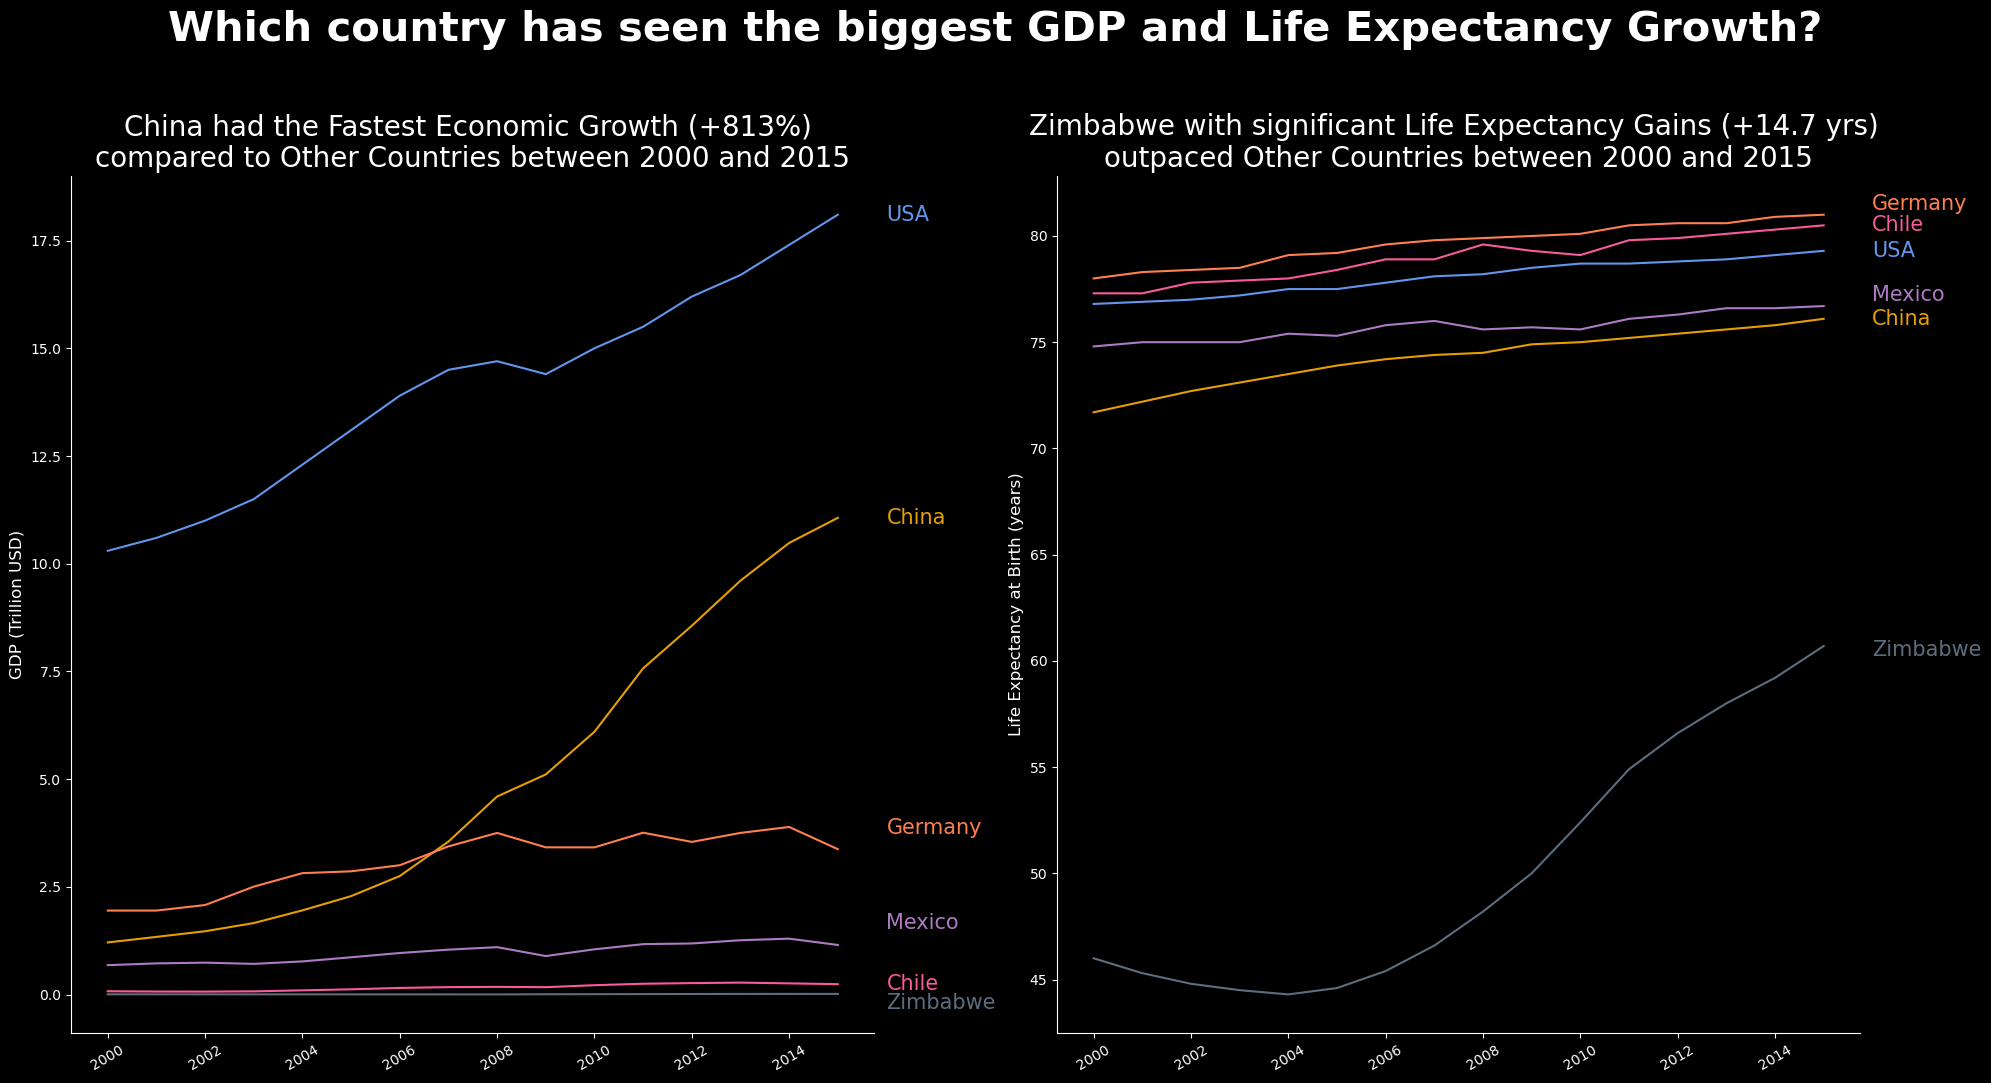

In [81]:
# Define the figure grid and overall title
plt.figure(figsize=(20, 11))  # Set the figure size
plt.subplots_adjust(wspace=0.25, hspace=0.25)  # Adjust space between subplots
plt.suptitle(
    'Which country has seen the biggest GDP and Life Expectancy Growth?',  # Main title
    fontsize=30,        # Font size
    fontweight='bold'   # Font weight
)

# Subplot 1: GDP Growth Over Time
ax1 = plt.subplot(1, 2, 1)  # Define the first subplot
sns.lineplot(
    data=data,  # Use the dataset
    x='year',   # Year on x-axis
    y='gdp_trillion',   # GDP on y-axis
    hue='country',      # Color lines by country
    palette=country_colors,  # Use country-specific colors
)
ax1.set_ylabel(
    gdp_label,   # Set the y-axis label for GDP
    fontsize=12  # Font size
)
ax1.set_xlabel('')  # Remove x-axis label for consistency

# Subplot 2: Life Expectancy Growth Over Time
ax2 = plt.subplot(1, 2, 2)  # Define the second subplot
sns.lineplot(
    data=data,  # Use the dataset
    x='year',   # Year on x-axis
    y='leb',    # Life Expectancy on y-axis
    hue='country',  # Color lines by country
    palette=country_colors  # Use country-specific colors
)
ax2.set_ylabel(
    leb_label,   # Set the y-axis label for Life Expectancy
    fontsize=12  # Font size
)
ax2.set_xlabel('')  # Remove x-axis label for consistency

# Customizations for both subplots
for ax in [ax1, ax2]: 
    ax.set_xticks(year_xticks)  # Set x-axis ticks
    ax.set_xticklabels(year_xticks, rotation=30)  # Rotate x-axis labels for readability
    ax.legend_.remove()  # Remove legends to declutter the plots
    ax.spines['right'].set_visible(False)  # Remove right spine for a cleaner look
    ax.spines['top'].set_visible(False)    # Remove top spine

# Annotate each country's label at the end of the lines
for ax, y_col in zip([ax1, ax2], ['gdp_trillion', 'leb']):  # Iterate through both subplots
    for country, color in country_colors.items():  # Loop through each country and its color
        # Filter data for the specific country
        country_data = data[data['country'] == country]
        
        # Get the last data point for the line
        x_last = country_data['year'].iloc[-1]  # Last x-coordinate (year)
        y_last = country_data[y_col].iloc[-1]   # Last y-coordinate (GDP or Life Expectancy)
        
        # Adjust offset dynamically to prevent text overlap
        offset = 0.5 if country in ['Germany', 'Mexico'] else -0.2 if country in ['Zimbabwe'] else 0
        
        # Add annotation for each country at the end of the line
        ax.text(
            x_last + 1,  # Slightly shift to the right of the last x-coordinate
            y_last + offset,  # Dynamically adjust y position
            country,  # Display country name
            color=color,  # Use the corresponding line color
            fontsize=15,  # Font size for annotation
            ha='left',    # Align text to the left
            va='center'   # Center text vertically
        )

# Calculate key insights dynamically
# 1. GDP growth (percentage change over time)
gdp_change = (data
                .groupby('country')['gdp_trillion'] # Group data by country
                .agg(lambda x: (x.iloc[-1] - x.iloc[0]) / x.iloc[0] * 100)  # Percent change formula
)
top_gdp_country = gdp_change.idxmax()  # Country with the largest GDP growth
top_gdp_growth = gdp_change.max()      # Largest GDP growth value

# 2. Life Expectancy increase (difference over time)
leb_change = (data
                .groupby('country')['leb']  # Group data by country
                .agg(lambda x: x.iloc[-1] - x.iloc[0])  # Absolute change formula
)
top_leb_country = leb_change.idxmax()  # Country with the largest life expectancy growth
top_leb_growth = leb_change.max()  # Largest life expectancy increase value

# Create dynamic titles based on insights
gdp_title = (
    f'{top_gdp_country} had the Fastest Economic Growth (+{round(top_gdp_growth)}%) \n'
    f'compared to Other Countries between {data.year.min()} and {data.year.max()}'
)
leb_title = (
    f'{top_leb_country} with significant Life Expectancy Gains (+{top_leb_growth:.1f} yrs) \n'
    f'outpaced Other Countries between {data.year.min()} and {data.year.max()}'
)

# Apply dynamic titles to subplots
ax1.set_title(
    gdp_title,  # Title Value
    fontsize=20 # Font size
)
ax2.set_title(
    leb_title,  # Title Value
    fontsize=20 # Font size
)

# Adjust layout for better appearance
plt.tight_layout(rect=[0, 0, 1, 0.95])  # Leave space for the main title

# Save the figure as a PNG file
plt.savefig('Visualizations/gdp_leb_growth_lineplot.png')

# Show the plot
plt.show()

#### Has GDP and life expectancy increased over time in the six nations?

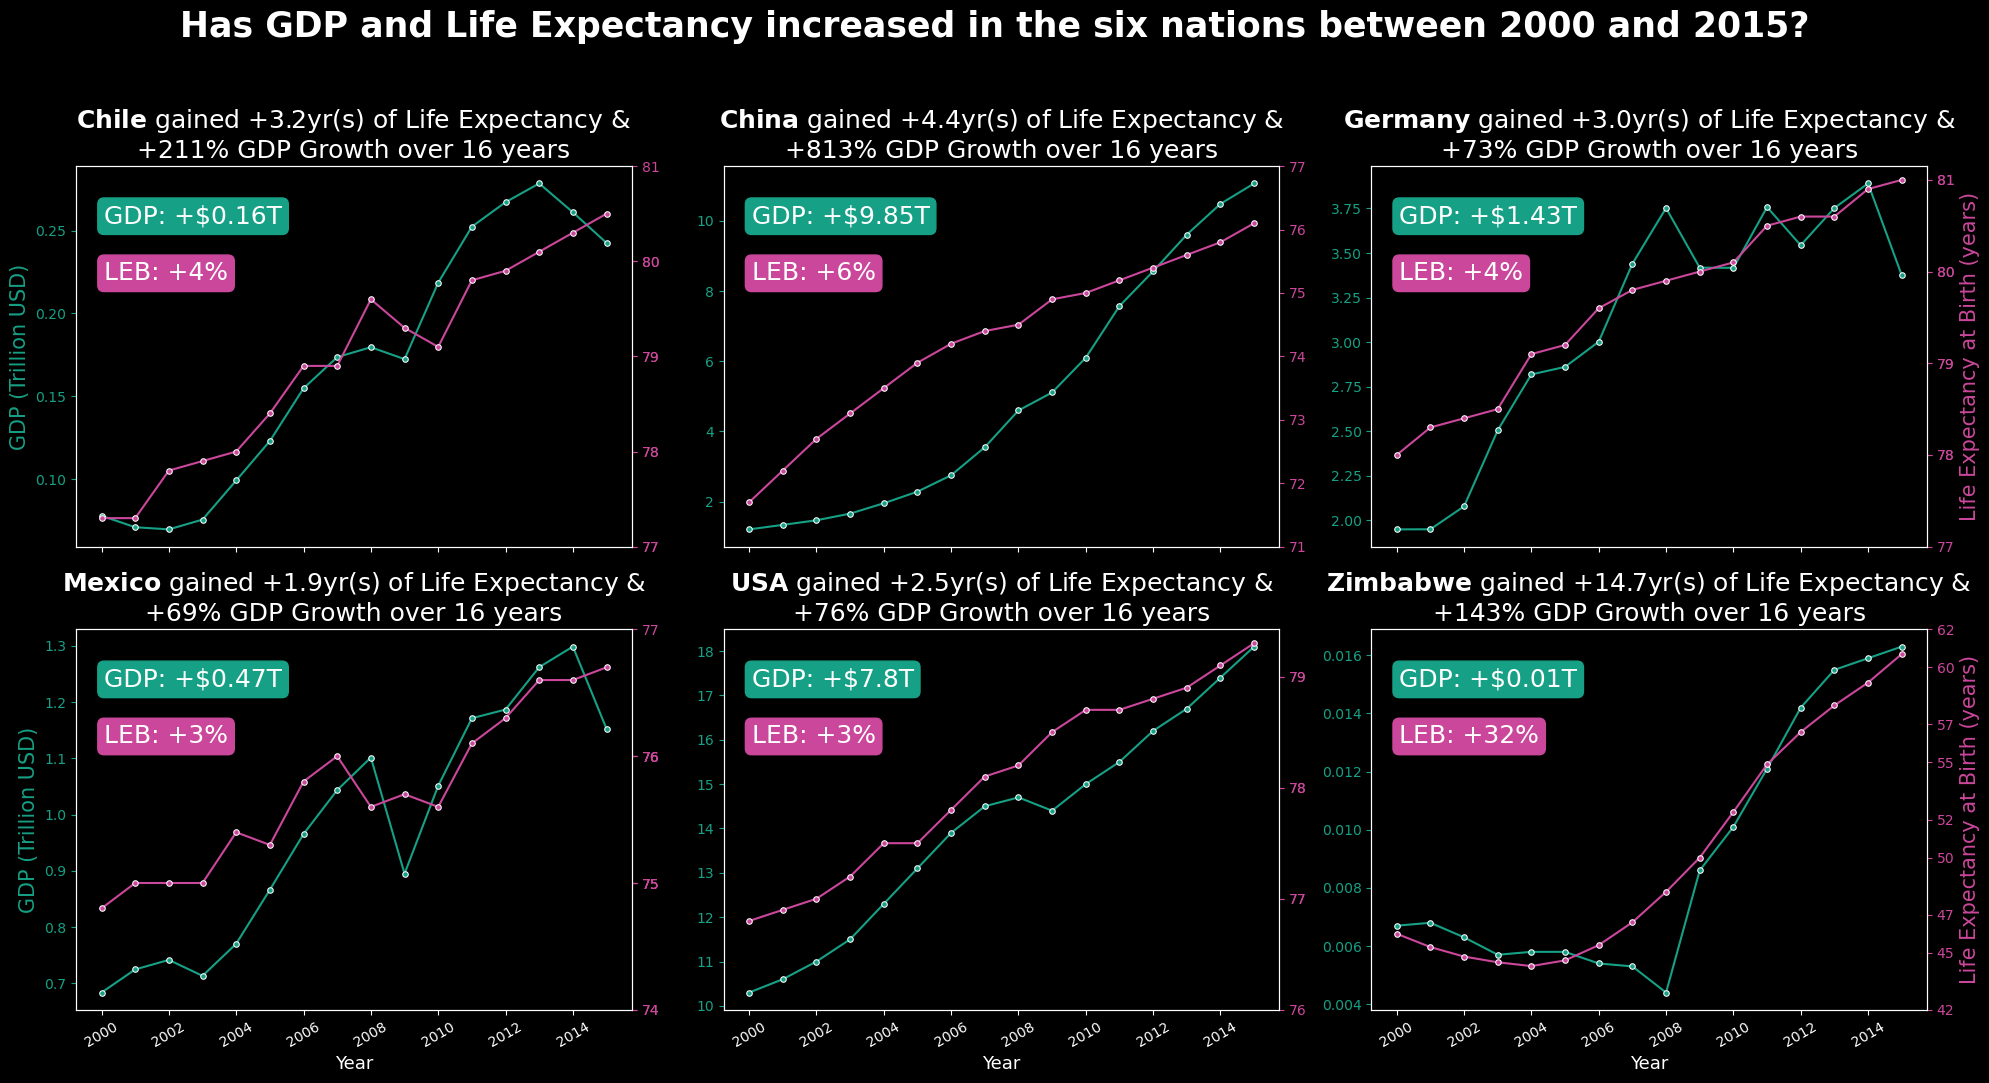

In [82]:
# Define figure grid and its title
fig, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(2, 3, figsize=(20, 11))  # Create a 2x3 grid of subplots
axs = [ax1, ax2, ax3, ax4, ax5, ax6]  # Store subplot axes in a list for easier iteration

#  Set the overall figure title dynamically based on the dataset's year range
fig.suptitle(
    f'Has GDP and Life Expectancy increased in the six nations between {data.year.min()} and {data.year.max()}?',  # Dynamic title based on year range
    fontsize=25,      # Font size
    fontweight='bold' # Font weight
)

# Adjust spacing between subplots
plt.subplots_adjust(wspace=0.22)

# Iterate over the axes and countries
for i, country in enumerate(countries):
    # Filter data for the current country
    data_t = data[data['country'] == country]

    # Use predefined axes for each country
    ax = axs[i]
    
    # Plot GDP (y-axis) as a function of year (x-axis)
    sns.lineplot(
        x='year',           # x axis
        y='gdp_trillion',   # y axis
        data=data_t,        # data used
        ax=ax, 
        color=chart_colors['gdp'],  # Assign GDP color
        marker='o',          # Add markers for clarity
        markersize=4         # Set markets size
    )
    
    # Create a secondary y-axis for life expectancy (LEB)
    twin_ax = ax.twinx()  # Create a twin y-axis for life expectancy
    sns.lineplot(
        x='year',       # x axis
        y='leb',        # y axis
        data=data_t,    # data used
        ax=twin_ax,
        color=chart_colors['leb'],  # Assign LEB color
        marker='o',     # Add markers for clarity
        markersize=4    # Set markets size
    ) 
    
    # Calculate growth metrics for GDP and Life Expectancy
    gdp_growth = round((data_t['gdp_trillion'].iloc[-1] - data_t['gdp_trillion'].iloc[0]) / data_t['gdp_trillion'].iloc[0] * 100)
    leb_growth = round((data_t['leb'].iloc[-1] - data_t['leb'].iloc[0]) / data_t['leb'].iloc[0] * 100)
    leb_years_gained = round(data_t['leb'].iloc[-1] - data_t['leb'].iloc[0], 1)
    gdp_trillion_growth = round((data_t['gdp_trillion'].iloc[-1] - data_t['gdp_trillion'].iloc[0]), 2)
    year_range = len(data_t['year'])
    
    # Define trends and signs for growth/decline
    if gdp_growth | leb_growth > 0:  
        sign = '+' # Growth indicator
        gdp_trend = 'An increase'
        year_trend = 'gained'
    else:
        sign = '-'  # Decline Indicator
        gdp_trend = 'A decrease'
        year_trend = 'lost'

    # Annotate GDP growth on the plot
    ax.annotate(
        f'GDP: {sign}${gdp_trillion_growth}T',  # GDP growth annotation
        xy=(0.05, 0.85),    # Position within the subplot
        xycoords='axes fraction',
        color='white',      # color
        fontsize=18,        # fontsize
        bbox=dict(
            facecolor=chart_colors['gdp'], 
            edgecolor=chart_colors['gdp'], 
            boxstyle='round, pad=0.25'
        )  
    )
    
    # Annotate Life Expectancy growth on the plot
    ax.annotate(
        f'LEB: {sign}{leb_growth}%',    # LEB growth annotation
        xy=(0.05, 0.7),     # Position within the subplot
        xycoords='axes fraction',
        color='white',      # color
        fontsize=18,        # fontsize
        bbox=dict(
             facecolor=chart_colors['leb'], 
             edgecolor=chart_colors['leb'], 
             boxstyle='round, pad=0.25'
        )  
    )
    
    # Set subplot title dynamically
    ax.set_title(
        f'$\mathbf{{{country}}}$ {year_trend} {sign}{leb_years_gained}yr(s) of Life Expectancy &\n{sign}{gdp_growth}% GDP Growth over {year_range} years',
        fontsize=18     # fontsize
    )
    
    # Set x-ticks and labels for years
    ax.set_xticks(year_xticks)
    ax.set_xticklabels(
        year_xticks, 
        rotation=30     # x axis label rotation
    )
    
    # Customize tick parameters for GDP (left y-axis)
    ax.tick_params(
        axis='y', 
        colors=chart_colors['gdp']
    )
    
    # Customize tick parameters for LEB (right y-axis)
    twin_ax.tick_params(
        axis='y', 
        colors=chart_colors['leb']      # Assign LEB color
    )
    
    # Ensure integer ticks for twin y-axis
    twin_ax.set_yticks(
        twin_ax.get_yticks().astype(int)
    )   

    # Add y-axis labels dynamically
    if ax in [ax1, ax4]: 
        ax.set_ylabel(
            gdp_label, 
            color=chart_colors['gdp'],  # Assign GDP color
            fontsize=15     # fontsize
        )
    else:
        ax.set_ylabel('')
    
    # Remove x-tick labels for the first row
    if ax in [ax1, ax2, ax3]:
        ax.set_xticklabels('')
    
    # Add Life Expectancy label for the last column
    if ax in [ax3, ax6]: 
        twin_ax.set_ylabel(
            leb_label, 
            color=chart_colors['leb'],  # Assign LEB color
            fontsize=15     # fontsize
        )
    else:
        twin_ax.set_ylabel('')
    
    # Add x-axis label for the last row
    if ax in [ax4, ax5, ax6]: 
        ax.set_xlabel(
            'Year',
            fontsize=13     # fontsize
        )
    else: 
        ax.set_xlabel('')

# Adjust layout for better appearance
plt.tight_layout(rect=[0, 0, 1, 0.95])  # Leave space for the figure title

# Save the figure to a file
plt.savefig('Visualizations/gdp_leb_growth_lineplot_grid.png')

# Display the plot
plt.show()

#### What is the average GDP and life expectancy in these nations?

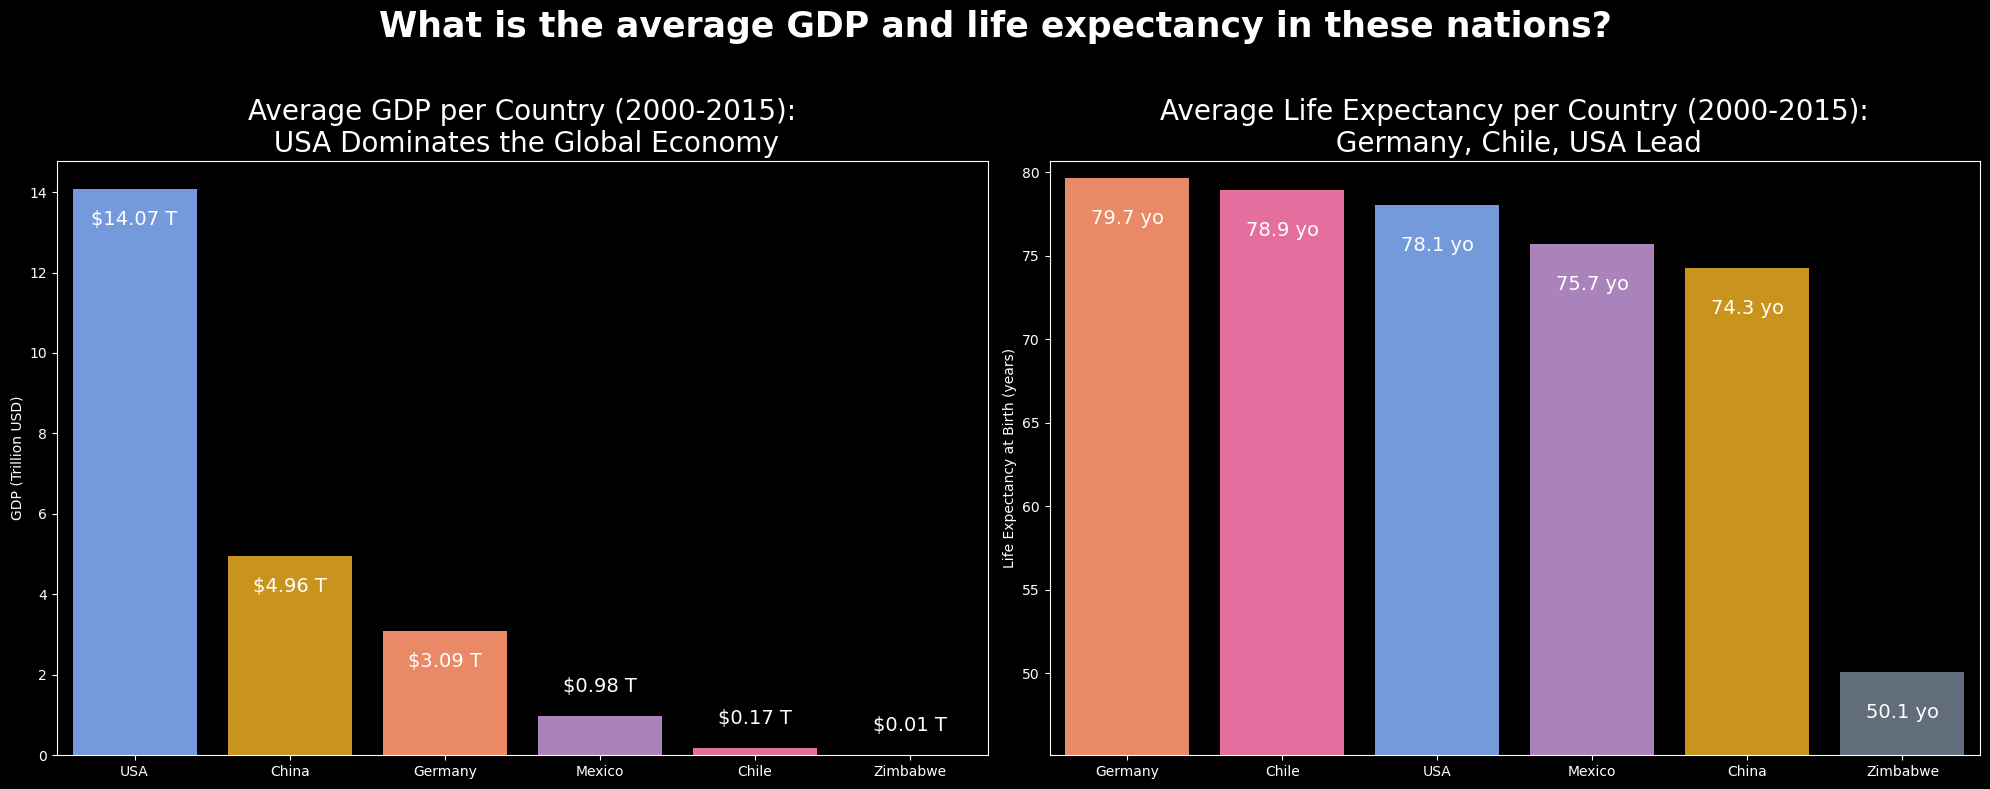

In [72]:
# Define figure grid and its title
fig = plt.figure(figsize=(20, 8))  # Create a single-row figure with two subplots
plt.subplots_adjust(wspace=0.5, hspace=0.25)  # Adjust spacing between subplots
fig.suptitle(
    'What is the average GDP and life expectancy in these nations?',  # Main title
    fontsize=25,    # fontsize 
    fontweight='bold'   # font weight
)

# First subplot: Average GDP per country
ax1 = plt.subplot(1, 2, 1)  # Define first subplot in a 1x2 layout
sns.barplot(
    x=data['country'],      # Country on x-axis
    y=data['gdp_trillion'], # GDP on y-axis
    hue=data['country'],    # Color by country
    estimator='mean',       # Calculate mean GDP for each country
    errorbar=None,          # Remove error bars for clarity
    order=data.sort_values(by='gdp_trillion', ascending=False)['country'],  # Sort countries by GDP
    palette=country_colors  # Use predefined color palette
)
plt.title(
    f'Average GDP per Country (2000-2015):\n {gdp_mean.index[0]} Dominates the Global Economy',  # Dynamic title based on highest GDP
    fontsize=20
)
ax1.set_ylabel(gdp_label)   # Set y-axis label for GDP

# Second subplot: Average Life Expectancy per country
ax2 = plt.subplot(1, 2, 2)  # Define second subplot in a 1x2 layout
sns.barplot(
    x=data['country'],  # Country on x-axis
    y=data['leb'],      # Life Expectancy on y-axis
    hue=data['country'],    # Color by country
    estimator='mean',   # Calculate mean Life Expectancy for each country
    errorbar=None,      # Remove error bars for clarity
    order=data.sort_values(by='leb', ascending=False)['country'],  # Sort countries by Life Expectancy
    palette=country_colors  # Use predefined color palette
)
plt.title(
    f'Average Life Expectancy per Country (2000-2015):\n {leb_mean.index[0]}, {leb_mean.index[1]}, {leb_mean.index[2]} Lead',  # Dynamic title based on top 3 countries
    fontsize=20
)
ax2.set_ylabel(leb_label)  # Set y-axis label for Life Expectancy
ax2.axis(ymin=leb_mean.values.min() - 5, ymax=leb_mean.values.max() + 1)  # Dynamically adjust y-axis range for clarity

# Iterate over both axes (subplots) for common adjustments
axs = [ax1, ax2]
for ax in axs: 
    ax.set_xlabel('')  # Remove x-axis labels
    # Annotate values on top of each bar
    for bar in ax.patches:
        bar_height = bar.get_height()  # Get the height of each bar
        ax.text(
            bar.get_x() + bar.get_width() / 2,  # X-coordinate: center of the bar
            (bar_height - 1 if bar_height > 1 else bar_height + 0.5) if ax == ax1 else bar_height - 3,  # Adjust Y-coordinate
            f'${bar_height:.2f} T' if ax == ax1 else f'{bar_height:.1f} yo',  # Format annotation (GDP: Trillions, LEB: Years)
            ha='center',  # Horizontally center-align the text
            va='bottom',  # Vertically align text to the bottom
            fontsize=14   # Font size for annotations
        )

# Adjust layout for better appearance
plt.tight_layout(rect=[0, 0, 1, 0.95])  # Leave space for the main title

# Save the plot as a PNG file
plt.savefig('Visualizations/gdp_leb_mean_barplot.png')

# Display the plot
plt.show()

#### What is the distribution of GDP and life expectancy by year?

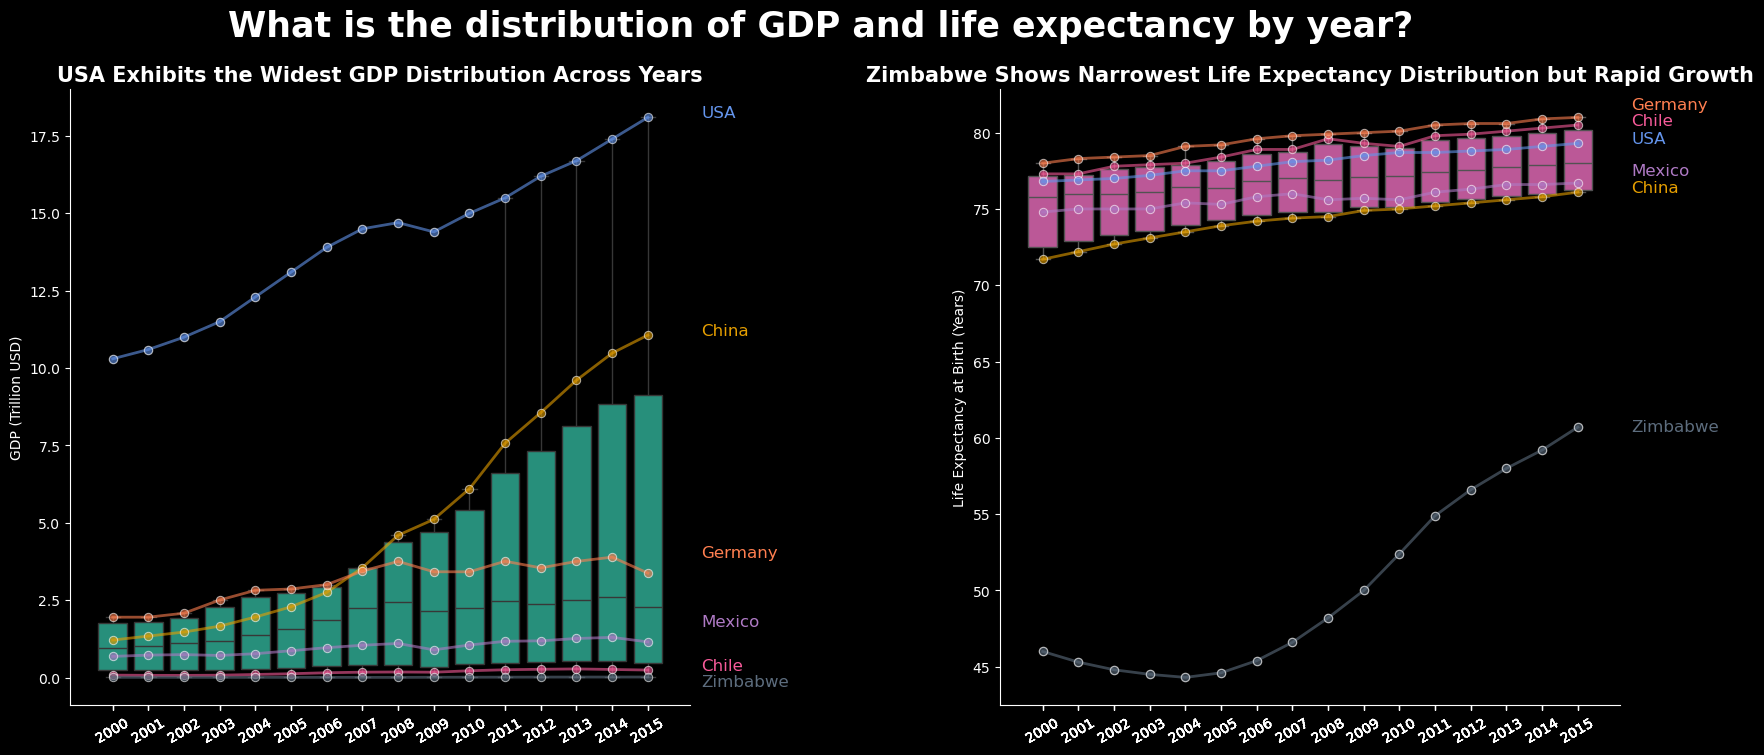

In [73]:
# Convert 'year' column to string to treat as categorical for plotting
data_y = data
data_y['year'] = data_y['year'].astype(str)

# Define figure and layout for the plot
fig = plt.figure(figsize=(20, 8))  # Set figure size
plt.subplots_adjust(wspace=0.5, hspace=0.25)  # Adjust space between subplots
fig.suptitle(
    'What is the distribution of GDP and life expectancy by year?',  # Main title
    fontsize=25,        # fontsize
    fontweight='bold'   # font weight
)

# Subplot 1: Boxplot for GDP with USA line
ax1 = plt.subplot(1, 2, 1)  # Define first subplot
sns.boxplot(
    data=data_y,  # Data for GDP
    x='year',     # Year on x-axis
    y='gdp_trillion',  # GDP on y-axis
    ax=ax1,
    color=chart_colors['gdp']  # Set boxplot color
)

# Add labels and title for the first subplot
ax1.set_title(
    'USA Exhibits the Widest GDP Distribution Across Years', 
    fontsize=15,        # fontsize
    fontweight='bold'   # font weight
)
ax1.set_xlabel('')  # Remove x-axis label
ax1.set_ylabel('GDP (Trillion USD)')  # Set y-axis label

# Subplot 2: Boxplot for Life Expectancy with Zimbabwe line
ax2 = plt.subplot(1, 2, 2)  # Define second subplot
sns.boxplot(
    data=data_y,  # Data for Life Expectancy
    x='year',     # Year on x-axis
    y='leb',      # Life Expectancy on y-axis
    ax=ax2,
    color=chart_colors['leb']  # Boxplot color
)

# Annotate labels for USA (on ax1) and Zimbabwe (on ax2)
for ax, y_col in zip([ax1, ax2], ['gdp_trillion', 'leb']):  # Loop through both subplots and corresponding columns
    for country, color in country_colors.items():  # Loop through each country and its color
        sns.lineplot(
            data=data_y[data_y['country'] == country],  # Filter data for the specific country
            x='year',  # Year on x-axis
            y=y_col,   # Corresponding y-axis data (GDP or Life Expectancy)
            ax=ax,
            color=country_colors[country],  # Line color based on the country
            linewidth=2,  # Line thickness
            marker='o',   # Add markers for each data point
            alpha=0.6     # Set transparency for clarity
        )
        
        # Retrieve the last data point for annotation
        country_data = data[data['country'] == country]
        x_last = len(country_data['year'])  # Total number of years (converted to length)
        y_last = country_data[y_col].iloc[-1]  # Last value of the respective y-axis data
        
        # Set x-axis ticks and rotate labels for better readability
        ax.set_xticks(data_y['year'])  # Set ticks to match the years
        ax.set_xticklabels(data_y['year'], rotation=30)  # Rotate tick labels
        ax.set_xlabel('')  # Remove default x-axis label
        ax.spines['right'].set_visible(False)  # Remove right spine for a cleaner look
        ax.spines['top'].set_visible(False)    # Remove top spine for a cleaner look
        
        # Adjust annotation offset dynamically to prevent overlap
        offset = 0.5 if country in ['Germany', 'Mexico'] else -0.3 if country in ['Zimbabwe'] else 0
        if ax == ax1:  # Annotate on the first subplot (GDP)
            ax1.text(
                x_last + 0.5,    # Slightly offset x position
                y_last + offset, # Dynamically adjust y position
                country,  # Country name as annotation
                color=country_colors[country],  # Use the country-specific color
                fontsize=12,  # Font size for annotation
                ha='left'     # Horizontally align text to the left
            )
        else:  # Annotate on the second subplot (Life Expectancy)
            ax2.text(
                x_last + 0.5,     # Slightly offset x position
                y_last + offset,  # Dynamically adjust y position
                country,  # Country name as annotation
                color=country_colors[country],  # Use the country-specific color
                fontsize=12,  # Font size for annotation
                ha='left'     # Horizontally align text to the left
            )

# Add labels and title for the second subplot
ax2.set_title(
    'Zimbabwe Shows Narrowest Life Expectancy Distribution but Rapid Growth', 
    fontsize=15,    # font size
    fontweight='bold'   # font weight
)
ax2.set_xlabel('')  # Remove x-axis label
ax2.set_ylabel('Life Expectancy at Birth (Years)')  # Set y-axis label

# Save the plot as a PNG file
plt.savefig('Visualizations/gdp_leb_distribution_boxplot_line.png')  # Save plot as PNG file

# Display the plot
plt.show()

# Revert 'year' column to integer after plotting
data_y['year'] = data_y['year'].astype(int)

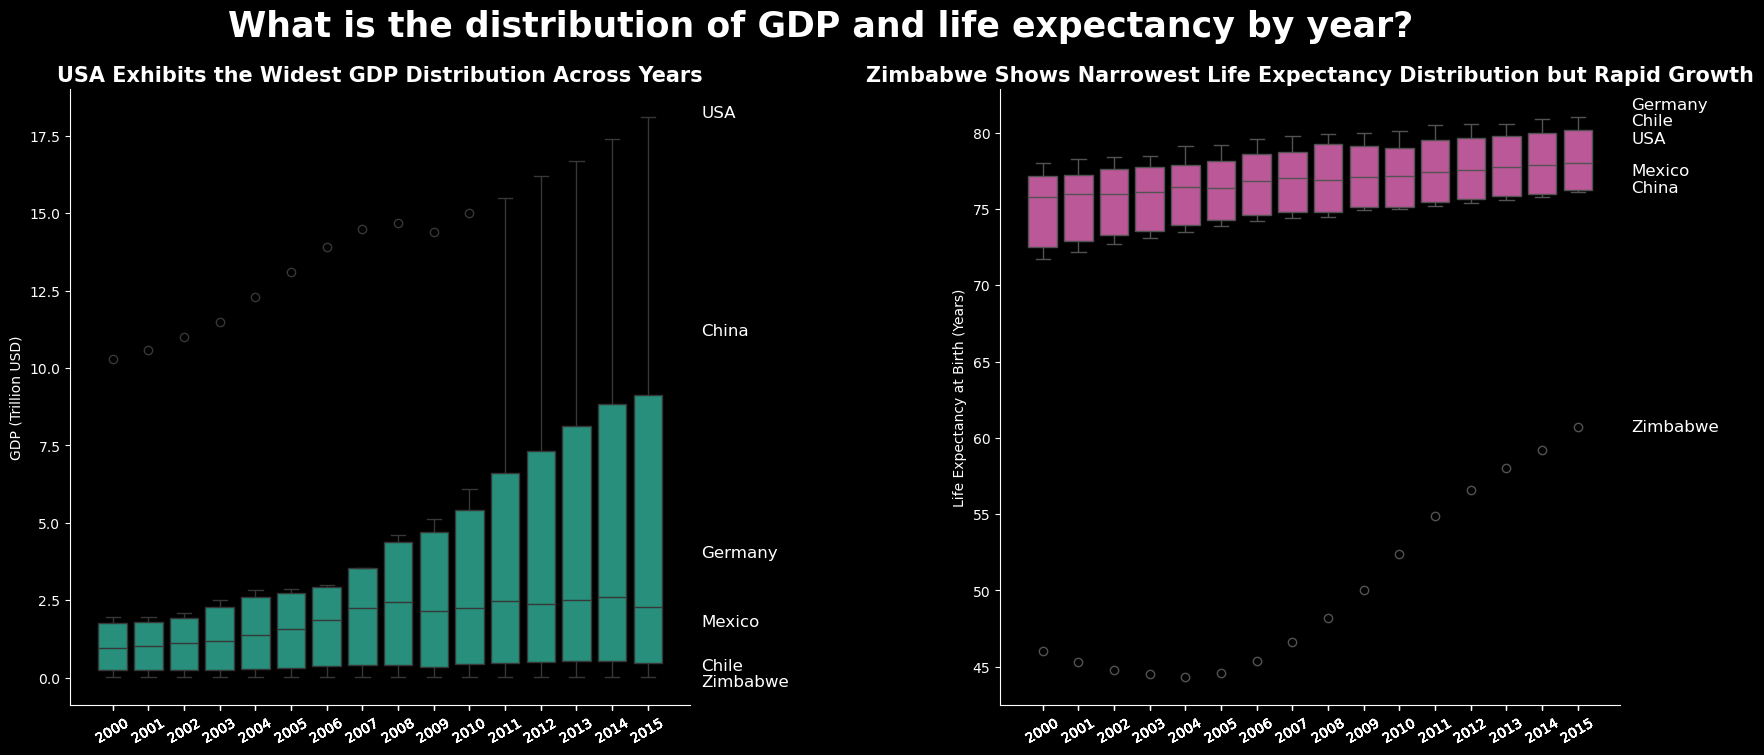

In [74]:
# Convert 'year' column to string to treat as categorical for plotting
data_y = data
data_y['year'] = data_y['year'].astype(str)

# Define figure and layout for the plot
fig = plt.figure(figsize=(20, 8))  # Set figure size
plt.subplots_adjust(wspace=0.5, hspace=0.25)  # Adjust space between subplots
fig.suptitle(
    'What is the distribution of GDP and life expectancy by year?',  # Main title
    fontsize=25, 
    fontweight='bold'
)

# Subplot 1: Boxplot for GDP with USA line
ax1 = plt.subplot(1, 2, 1)  # Define first subplot
sns.boxplot(
    data=data_y,  # Data for GDP
    x='year',  # Year on x-axis
    y='gdp_trillion',  # GDP on y-axis
    ax=ax1,
    color=chart_colors['gdp']  # Set boxplot color
)

# Add labels and title for the first subplot
ax1.set_title(
    'USA Exhibits the Widest GDP Distribution Across Years', 
    fontsize=15, 
    fontweight='bold'
)
ax1.set_xlabel('')  # Remove x-axis label
ax1.set_ylabel('GDP (Trillion USD)')  # Set y-axis label

# Subplot 2: Boxplot for Life Expectancy with Zimbabwe line
ax2 = plt.subplot(1, 2, 2)  # Define second subplot
sns.boxplot(
    data=data_y,  # Data for Life Expectancy
    x='year',  # Year on x-axis
    y='leb',  # Life Expectancy on y-axis
    ax=ax2,
    color=chart_colors['leb']  # Boxplot color
)

# Annotate labels for USA (on ax1) and Zimbabwe (on ax2)
for ax, y_col in zip([ax1, ax2], ['gdp_trillion', 'leb']):  # Loop through both subplots and corresponding columns
    for country, color in country_colors.items():  # Loop through each country and its color
        sns.lineplot(
            data=data_y[data_y['country'] == country],  # Filter data for the specific country
            x='year',  # Year on x-axis
            y=y_col,  # Corresponding y-axis data (GDP or Life Expectancy)
            ax=ax,
            #color='',  # Line color based on the country
            linewidth=0,  # Line thickness
            alpha=0.6  # Set transparency for clarity
        )
        
        # Retrieve the last data point for annotation
        country_data = data[data['country'] == country]
        x_last = len(country_data['year'])  # Total number of years (converted to length)
        y_last = country_data[y_col].iloc[-1]  # Last value of the respective y-axis data
        
        # Set x-axis ticks and rotate labels for better readability
        ax.set_xticks(data_y['year'])  # Set ticks to match the years
        ax.set_xticklabels(data_y['year'], rotation=30)  # Rotate tick labels
        ax.set_xlabel('')  # Remove default x-axis label
        ax.spines['right'].set_visible(False)  # Remove right spine for a cleaner look
        ax.spines['top'].set_visible(False)  # Remove top spine for a cleaner look
        
        # Adjust annotation offset dynamically to prevent overlap
        offset = 0.5 if country in ['Germany', 'Mexico'] else -0.3 if country in ['Zimbabwe'] else 0
        if ax == ax1:  # Annotate on the first subplot (GDP)
            ax1.text(
                x_last + 0.5,  # Slightly offset x position
                y_last + offset,  # Dynamically adjust y position
                country,  # Country name as annotation
                color='white',  # Use the country-specific color
                fontsize=12,  # Font size for annotation
                ha='left'  # Horizontally align text to the left
            )
        else:  # Annotate on the second subplot (Life Expectancy)
            ax2.text(
                x_last + 0.5,  # Slightly offset x position
                y_last + offset,  # Dynamically adjust y position
                country,  # Country name as annotation
                color='white',  # Use the country-specific color
                fontsize=12,  # Font size for annotation
                ha='left'  # Horizontally align text to the left
            )

# Add labels and title for the second subplot
ax2.set_title(
    'Zimbabwe Shows Narrowest Life Expectancy Distribution but Rapid Growth', 
    fontsize=15, 
    fontweight='bold'
)
ax2.set_xlabel('')  # Remove x-axis label
ax2.set_ylabel('Life Expectancy at Birth (Years)')  # Set y-axis label

# Save the plot as a PNG file
plt.savefig('Visualizations/gdp_leb_distribution_boxplot.png')  # Save plot as PNG file

# Display the plot
plt.show()

# Revert 'year' column to integer after plotting
data_y['year'] = data_y['year'].astype(int)

#### Additional Distribution Chart Initial Exploration

<Axes: xlabel='gdp_trillion', ylabel='country'>

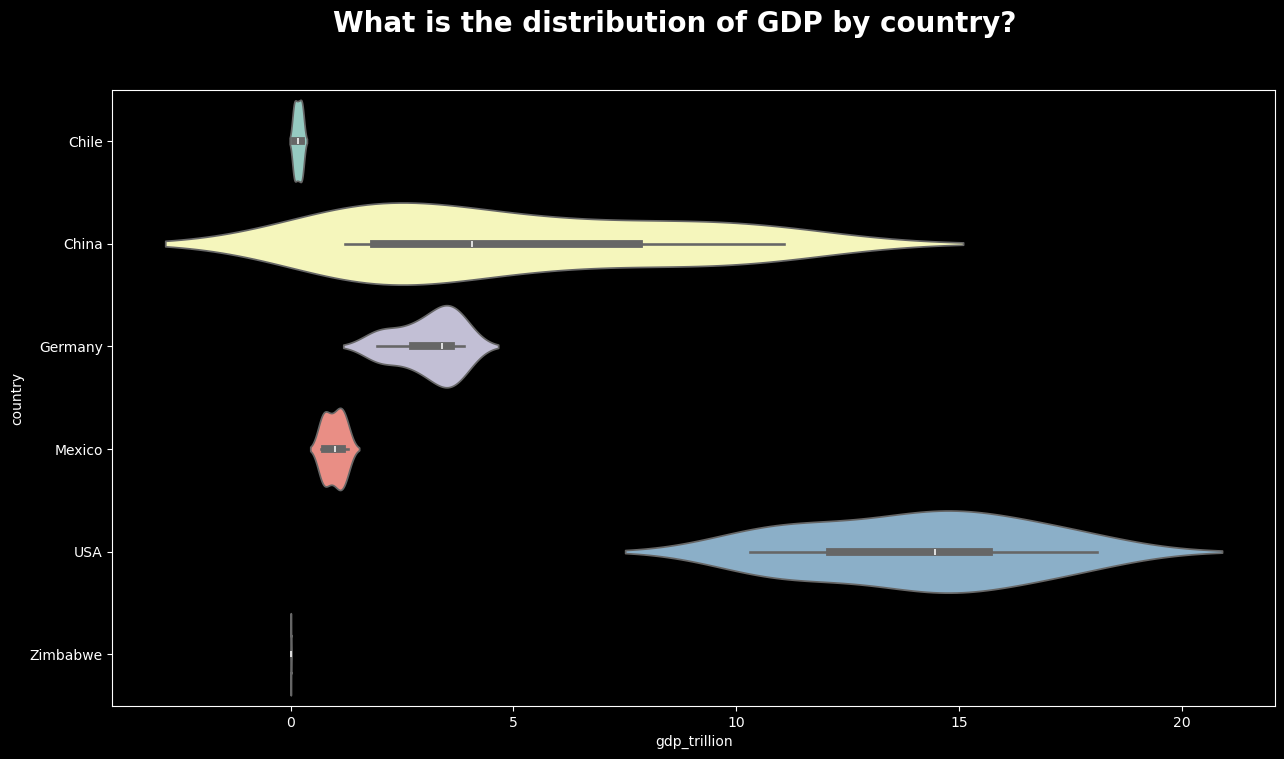

In [75]:
# Define figure grid and its title
fig = plt.figure(figsize=(15, 8))
# Set the overall figure title
fig.suptitle(
    'What is the distribution of GDP by country?', 
    fontsize= 20,       # fontsize
    fontweight='bold'   # font weight
)
# Plot violin plot for GDP distribution
sns.violinplot(
    data= data,         # data used
    x= 'gdp_trillion',  # x axis
    y= 'country',       # y axis
    hue= 'country'      # color
)

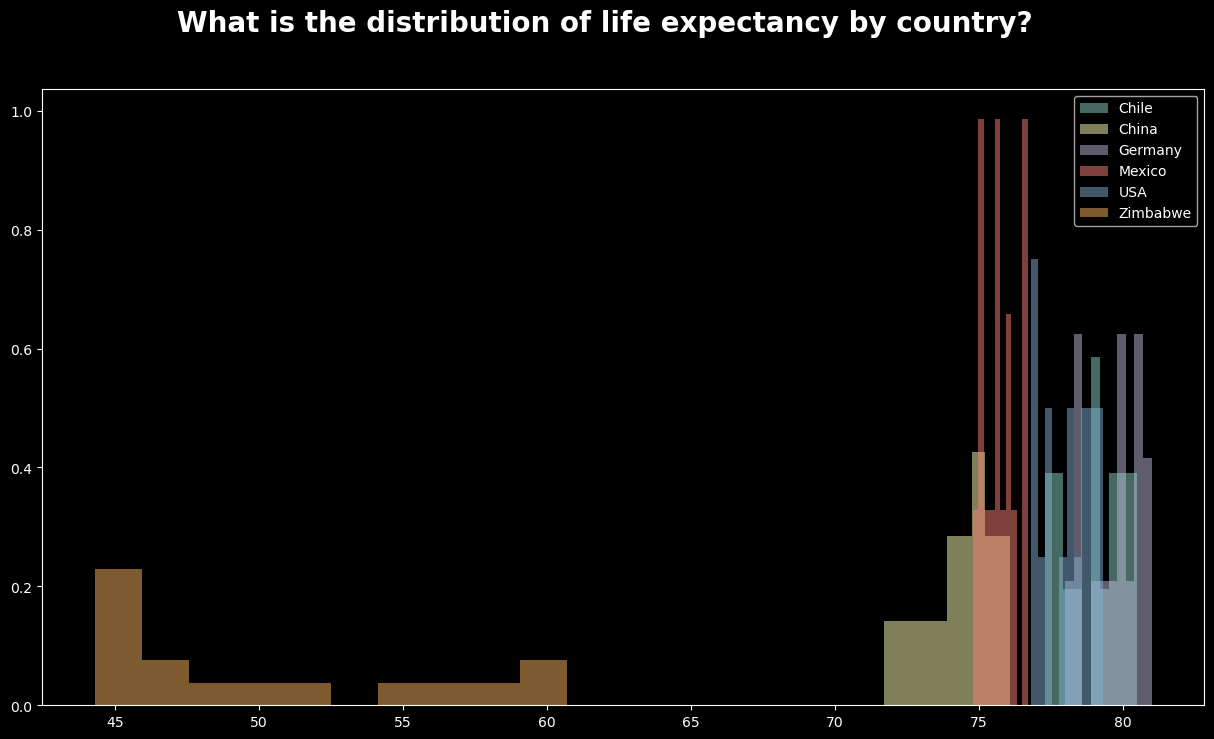

In [76]:
# Define figure grid and its title
fig = plt.figure(figsize=(15, 8))
# Set the overall figure title
fig.suptitle(
    'What is the distribution of life expectancy by country?', 
    fontsize= 20, 
    fontweight='bold'
)
# Loop through each country and plot a histogram
for country in countries: 
    # Filter dataset for the current country
    data_t = data[data['country'] == country]
    # Plot histogram for Life Expectancy (leb) distribution
    plt.hist(
        data = data_t,
        x= 'leb',
        alpha = 0.5,
        label= country,
        density = True, 
    )
plt.legend()
plt.show()

### Investigate whether countries with higher GDP consistently exhibit higher life expectancy

#### What is the relationship between GDP and Life Expectancy?

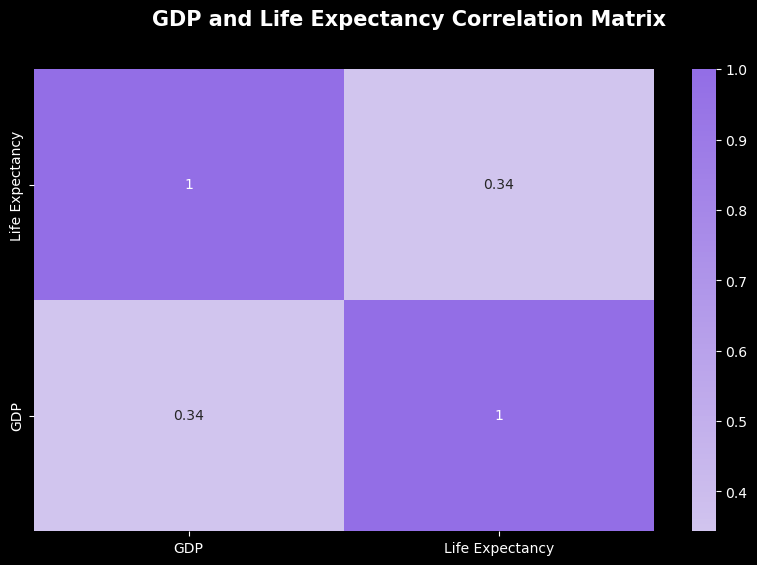

In [77]:
# Define the figure grid and its title
fig = plt.figure(figsize=(10, 6))  # Set the figure size
plt.subplots_adjust(wspace=0.25, hspace=0.25)  # Adjust subplot spacing (not relevant for a single plot but good practice)
fig.suptitle(
    'GDP and Life Expectancy Correlation Matrix',  # Main title for the heatmap
    fontsize=15,  # Font size for the title
    fontweight='bold'  # Bold font for emphasis
)

# Create a subplot for the heatmap
ax = plt.subplot()  # Define the axis for the heatmap

# Create a color palette for the heatmap
colors = sns.diverging_palette(150, 275, s=80, l=55, n=9, as_cmap=True)  # Diverging color palette for better contrast

# Generate the heatmap
sns.heatmap(
    data[['leb', 'gdp']].corr(),  # Correlation matrix for Life Expectancy (leb) and GDP
    center=0,  # Center the color map at 0 for balanced visual contrast
    cmap=colors,  # Apply the diverging color palette
    annot=True,   # Annotate cells with correlation values
    robust=True   # Use robust quantiles to handle outliers in the data
)

# Customize x-axis labels
ax.set_xticklabels(
    ['GDP', 'Life Expectancy'],  # Custom x-axis labels
    rotation=0,   # Keep labels horizontal
    ha='center',  # Center align the labels horizontally
    fontsize=10   # Font size for x-axis labels
)

# Customize y-axis labels
ax.set_yticklabels(
    ['Life Expectancy', 'GDP'],  # Custom y-axis labels
    rotation=90,  # Rotate labels vertically
    fontsize=10   # Font size for y-axis labels
)

# Save the plot as a PNG file
plt.savefig('Visualizations/gdp_leb_correlation_matrix_heatmap.png')  # Save plot as PNG file

# Display the plot
plt.show()

#### Is there a correlation between GDP and life expectancy of a country?

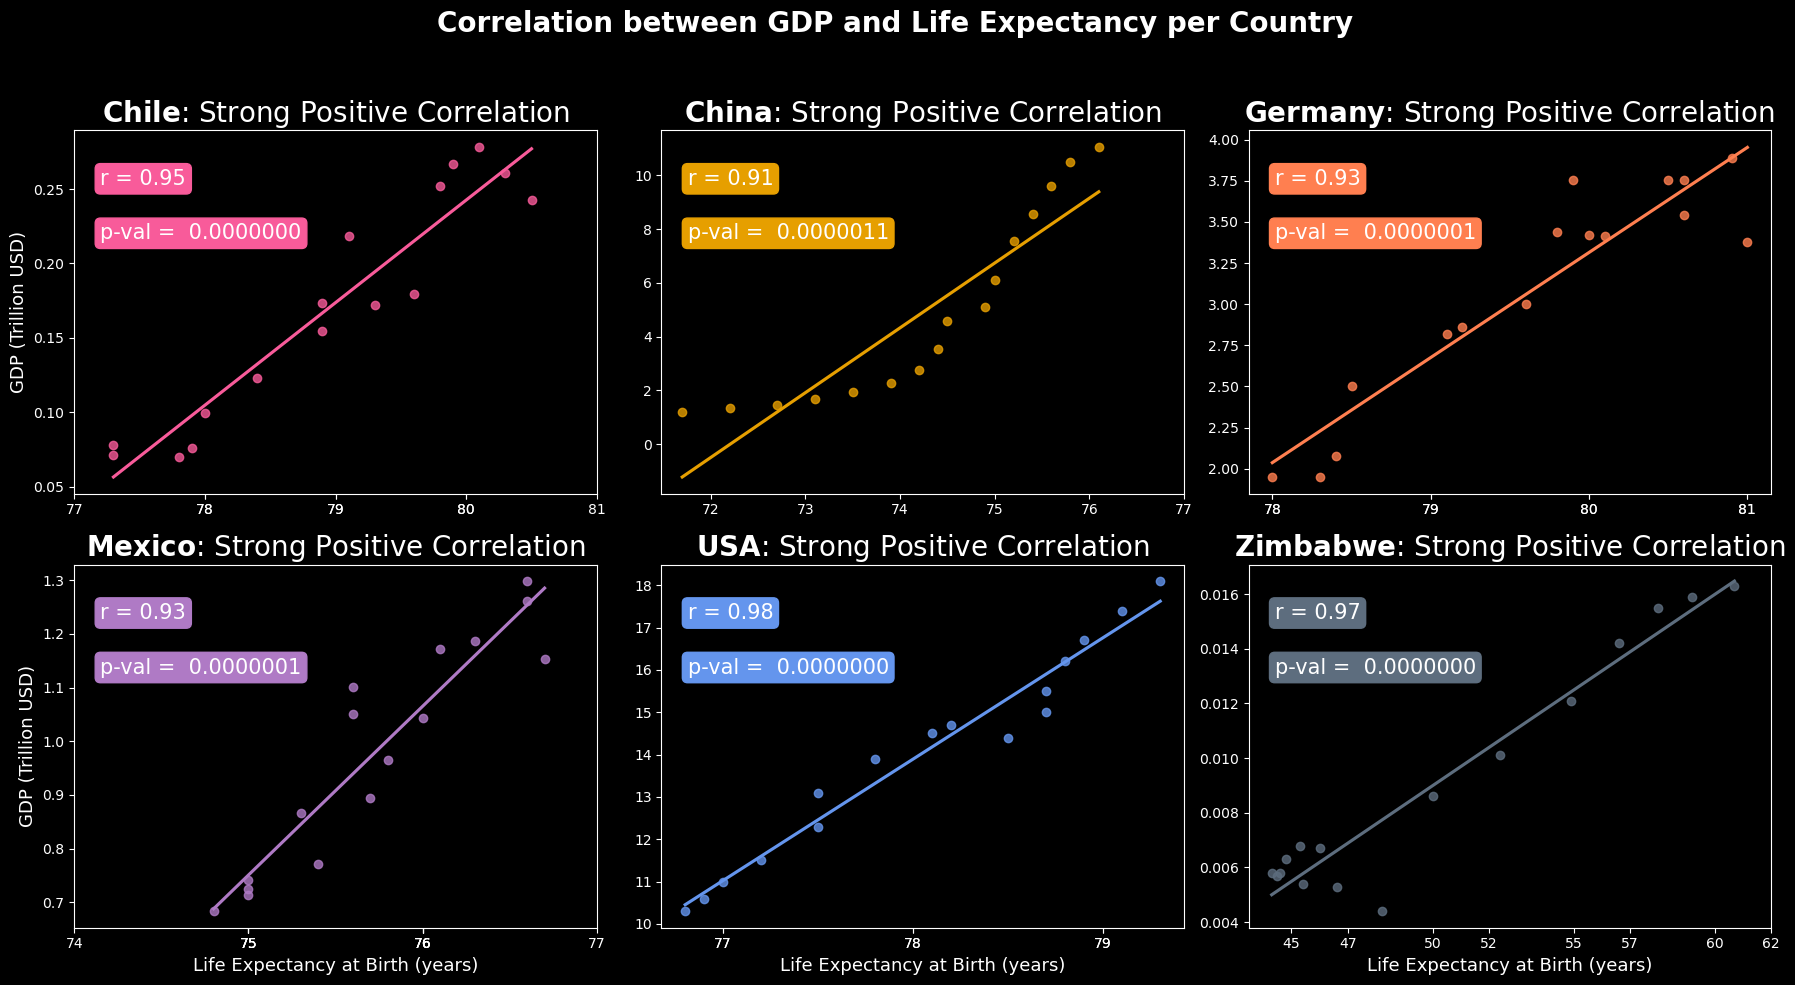

In [78]:
# Define figure grid and set the overall title
fig, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(2, 3, figsize=(18, 10))  # Create a 2x3 grid for subplots
axs = [ax1, ax2, ax3, ax4, ax5, ax6]  # Flatten the axes for easy iteration
plt.subplots_adjust(wspace=0.22, hspace=0.25)  # Adjust spacing between subplots
fig.suptitle(
    'Correlation between GDP and Life Expectancy per Country',  # Overall title
    fontsize=20,  # Font size for the title
    fontweight='bold'  # Bold font for emphasis
)

# Iterate over the axes and corresponding countries
for i, country in enumerate(countries):
    # Filter the data for the current country
    data_t = data[data['country'] == country]
    
    # Use the current subplot axis
    ax = axs[i]
    
    # Create a regression plot for GDP vs. Life Expectancy
    sns.regplot(
        x='leb',  # Life Expectancy on the x-axis
        y='gdp_trillion',  # GDP on the y-axis
        data=data_t,  # Filtered data for the current country
        ax=ax,  # Use the current subplot axis
        scatter_kws={'color': country_colors[country]},  # Scatter plot color
        line_kws={'color': country_colors[country]},  # Regression line color
        ci=False  # Disable confidence intervals for cleaner visualization
    )

    # Calculate correlation coefficient (r) and p-value
    r, p_value = stats.pearsonr(data_t['gdp_trillion'], data_t['leb'])
    
    # Determine the direction of the correlation
    if r > 0:
        direction = "Positive Correlation"
    else:
        direction = "Negative Correlation"
    
    # Determine the strength of the correlation
    if abs(r) >= 0.8:
        strength = "Strong"
    elif 0.5 <= abs(r) < 0.8:
        strength = "Moderate"
    else:
        strength = "Weak"

    # Annotate the correlation coefficient on the plot
    ax.annotate(
        f'r = {r :.2f}',  # Display the correlation coefficient
        xy=(0.05, 0.85),  # Position within the subplot
        xycoords='axes fraction',  # Coordinate reference within the axes
        color='white',  # Text color
        fontsize=15,    # Font size
        bbox=dict(
            facecolor=country_colors[country],  # Background color matches the country color
            edgecolor=country_colors[country],  # Border color
            boxstyle='round, pad=0.25'  # Rounded box with padding
        )
    )

    # Annotate the p-value on the plot
    ax.annotate(
        f'p-val = {p_value : .7f}',  # Display the p-value
        xy=(0.05, 0.7),  # Position within the subplot
        xycoords='axes fraction',
        color='white',
        fontsize=15,
        bbox=dict(
            facecolor=country_colors[country],
            edgecolor=country_colors[country],
            boxstyle='round, pad=0.25'
        )
    )

    # Set the title for each subplot
    ax.set_title(
        f'$\mathbf{{{country}}}$: {strength} {direction}',  # Country name with correlation details
        fontsize=20
    )

    # Set x-ticks to integers and remove the first tick for better alignment
    ax.set_xticks(ax.get_xticks()[1:].astype(int))    

    # Add y-axis label for GDP only for the leftmost subplots
    if ax in [ax1, ax4]: 
        ax.set_ylabel(
            'GDP (Trillion USD)',  # Y-axis label
            fontsize=13
        )
    else:
        ax.set_ylabel('')  # Remove y-axis labels for other subplots
    
    # Add x-axis label for Life Expectancy only for the bottom row
    if ax in [ax4, ax5, ax6]: 
        ax.set_xlabel(
            'Life Expectancy at Birth (years)',  # X-axis label
            fontsize=13
        )
    else: 
        ax.set_xlabel('')  # Remove x-axis labels for other subplots

# Adjust layout for better appearance
plt.tight_layout(rect=[0, 0, 1, 0.95])  # Leave space for the overall title

# Save the plot as a PNG file
plt.savefig('Visualizations/gdp_leb_correlation_pearsonr_regplot.png')  # Save plot as PNG file

# Display the plot
plt.show()

In [79]:
# Fit linear model to predict leb value based on GDP
model = sm.OLS.from_formula(
    'leb ~ gdp', 
    data).fit()
# Print Model Parameters
model.params

Intercept    7.005478e+01
gdp          7.047546e-13
dtype: float64

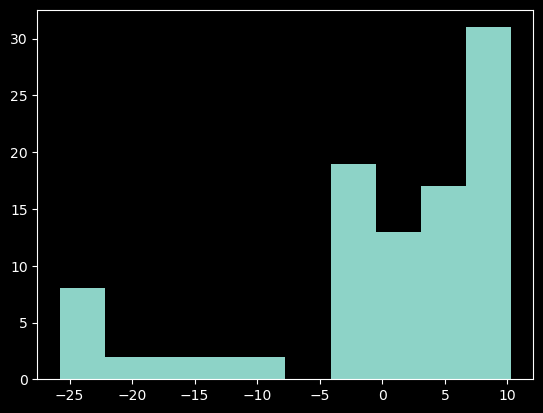

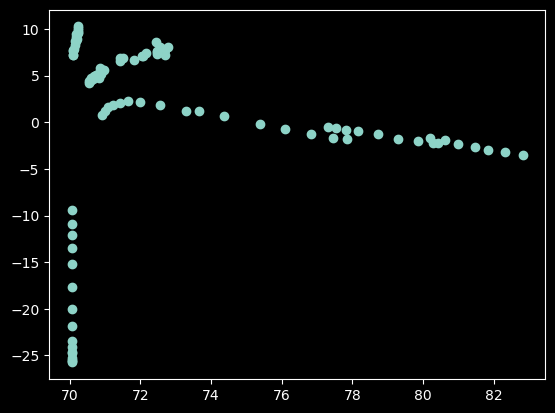

<Figure size 640x480 with 0 Axes>

In [80]:
# Calculate fitted values and residuals
fitted_values = model.predict(data)
residuals = data['leb'] - fitted_values

# Check normality assumption
plt.hist(residuals)
plt.show()
plt.clf()

# Check homoscedasticity assumption
plt.scatter(x= fitted_values, y= residuals)
plt.show()
plt.clf()